# Epistemic uncertainty

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

from models import *
from utils import *

## Data

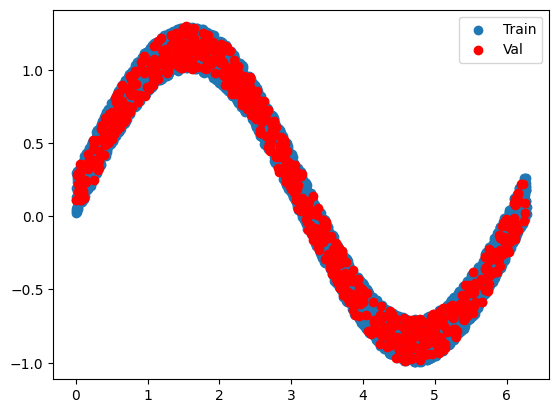

In [2]:
X = torch.rand(5000)*2*torch.pi
Y = torch.sin(X) + torch.rand(5000)*0.3

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15)

plt.scatter(X_train, y_train, label='Train')
plt.scatter(X_test, y_test, label='Val', c='red')
plt.legend()

In [3]:
X_train, X_test, y_train, y_test = X_train.view(-1, 1), X_test.view(-1, 1), y_train.view(-1, 1), y_test.view(-1, 1)

train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_test, y_test)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=True, drop_last=True)

## Deep ensemble

In [4]:
base_model_1 = MLP() 
optimizer = torch.optim.Adam(base_model_1.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_1, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

base_model_2 = MLP() 
optimizer = torch.optim.Adam(base_model_2.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_2, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

base_model_3 = MLP() 
optimizer = torch.optim.Adam(base_model_3.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_3, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

base_model_4 = MLP() 
optimizer = torch.optim.Adam(base_model_4.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(base_model_4, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=50)

Epoch: 50 :::: Train loss 0.009522396139800549 :::: Val loss 0.008646237663924694 

Epoch: 100 :::: Train loss 0.00899216253310442 :::: Val loss 0.008904248476028442 

Epoch: 50 :::: Train loss 0.008502009324729443 :::: Val loss 0.007761846296489239 

Epoch: 100 :::: Train loss 0.00945284403860569 :::: Val loss 0.007841670885682106 

Epoch: 50 :::: Train loss 0.00913622323423624 :::: Val loss 0.007660956587642431 

Epoch: 100 :::: Train loss 0.008964245207607746 :::: Val loss 0.008763158693909645 

Epoch: 50 :::: Train loss 0.010904544964432716 :::: Val loss 0.00829758495092392 

Epoch: 100 :::: Train loss 0.008570407517254353 :::: Val loss 0.008420445024967194 



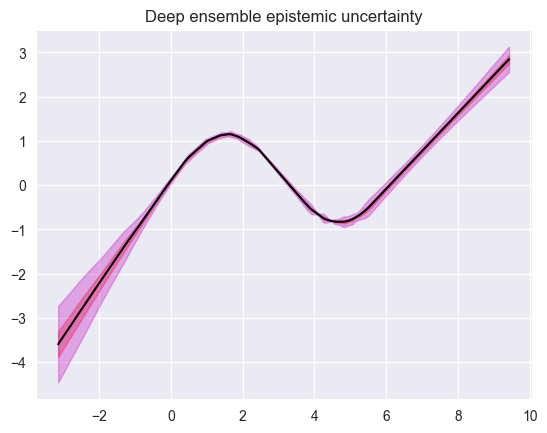

In [27]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble epistemic uncertainty')

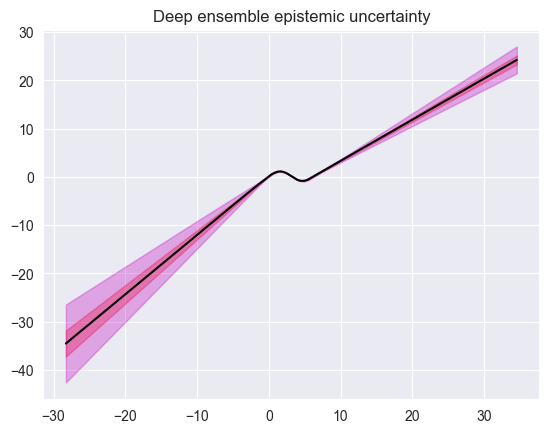

In [26]:
x_plot = torch.linspace(-9*np.pi,11*np.pi,200).view(-1, 1)

y_model = base_model_1(x_plot.to('cuda'))
y_model = torch.cat((y_model,base_model_2(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_3(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,base_model_4(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Deep ensemble epistemic uncertainty')

## Masksemble

In [7]:
mask_model = MLP_Maksembles(4,2.0) 
optimizer = torch.optim.Adam(mask_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(mask_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.027473697438836098 :::: Val loss 0.022814884781837463 

Epoch: 20 :::: Train loss 0.016290051862597466 :::: Val loss 0.021842509508132935 

Epoch: 30 :::: Train loss 0.013726950623095036 :::: Val loss 0.011524703353643417 

Epoch: 40 :::: Train loss 0.014418253675103188 :::: Val loss 0.010836809873580933 

Epoch: 50 :::: Train loss 0.01117715984582901 :::: Val loss 0.010136733762919903 

Epoch: 60 :::: Train loss 0.011525341309607029 :::: Val loss 0.01432038750499487 

Epoch: 70 :::: Train loss 0.010943397879600525 :::: Val loss 0.009211743250489235 

Epoch: 80 :::: Train loss 0.011383546516299248 :::: Val loss 0.011870711110532284 

Epoch: 90 :::: Train loss 0.010516759008169174 :::: Val loss 0.009282131679356098 

Epoch: 100 :::: Train loss 0.010717912577092648 :::: Val loss 0.009775728918612003 



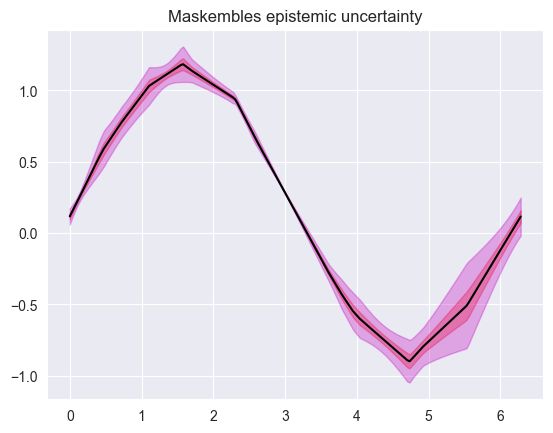

In [25]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)

y_model = mask_model(torch.tile(x_plot,(4,1)).to('cuda'))
y_model = torch.cat((y_model[:200], y_model[200:400], y_model[400:600], y_model[600:]),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles epistemic uncertainty')

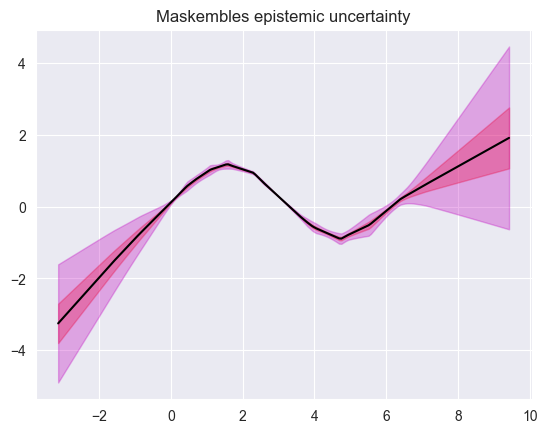

In [22]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = mask_model(torch.tile(x_plot,(4,1)).to('cuda'))
y_model = torch.cat((y_model[:200], y_model[200:400], y_model[400:600], y_model[600:]),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Maskembles epistemic uncertainty')


## Dropout

In [10]:
drop_model = MLP_Dropout() 
optimizer = torch.optim.Adam(drop_model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()
trainer(drop_model, train_dataloader, val_dataloader, optimizer, criterion, epochs=100, verbose=10)

Epoch: 10 :::: Train loss 0.03701787441968918 :::: Val loss 0.01697029545903206 

Epoch: 20 :::: Train loss 0.03259864076972008 :::: Val loss 0.014344866387546062 

Epoch: 30 :::: Train loss 0.03329282999038696 :::: Val loss 0.011632760986685753 

Epoch: 40 :::: Train loss 0.033432792872190475 :::: Val loss 0.011091451160609722 

Epoch: 50 :::: Train loss 0.032283443957567215 :::: Val loss 0.012226210907101631 

Epoch: 60 :::: Train loss 0.030550144612789154 :::: Val loss 0.01215870026499033 

Epoch: 70 :::: Train loss 0.03113863803446293 :::: Val loss 0.01354182604700327 

Epoch: 80 :::: Train loss 0.031632211059331894 :::: Val loss 0.015640124678611755 

Epoch: 90 :::: Train loss 0.032377950847148895 :::: Val loss 0.015446185134351254 

Epoch: 100 :::: Train loss 0.034309711307287216 :::: Val loss 0.023647688329219818 



In [11]:
#Activando dropout en inferencia
drop_model.eval()
for m in drop_model.modules():
  if m.__class__.__name__.startswith('Dropout'):
    m.train()

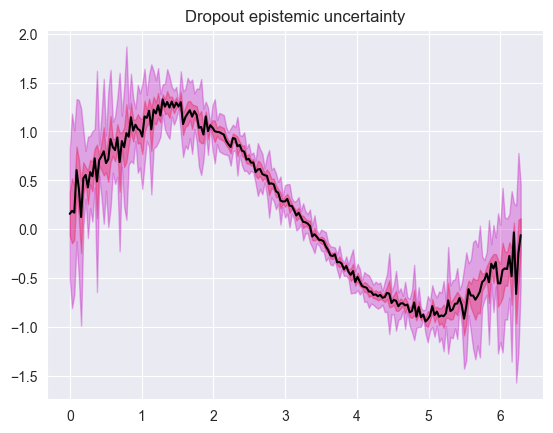

In [23]:
x_plot = torch.linspace(0,2*np.pi,200).view(-1, 1)
N_model = 4

y_model = drop_model(x_plot.to('cuda'))
for i in range(N_model-1):
    y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout epistemic uncertainty')

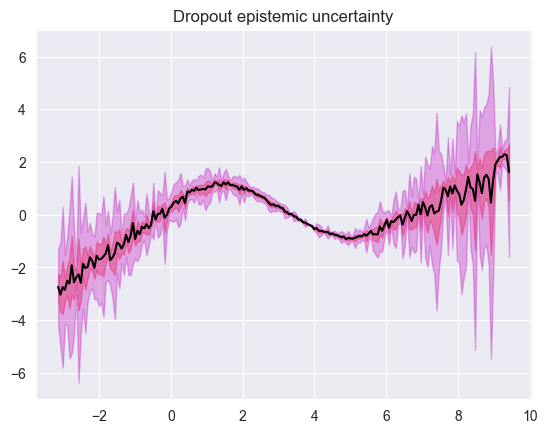

In [24]:
x_plot = torch.linspace(-1*np.pi,3*np.pi,200).view(-1, 1)

y_model = drop_model(x_plot.to('cuda'))
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = torch.cat((y_model,drop_model(x_plot.to('cuda'))),dim=1)
y_model = y_model.cpu().detach()

y_mean = torch.mean(y_model,dim=1)
y_std = torch.std(y_model,dim=1)

plot_uncertanity(x_plot, y_mean, y_std, 'Dropout epistemic uncertainty')